<a href="https://colab.research.google.com/github/abraham-30/ProjectStockPrediction/blob/main/stockprediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

In [8]:
#!wget https://raw.githubusercontent.com/abraham-30/ProjectStockPrediction/main/dataset/BBCA/BBCA.JK.csv

In [9]:
data_stock = pd.read_csv('BBCA.JK.csv')

##DATA VISUALIZATION

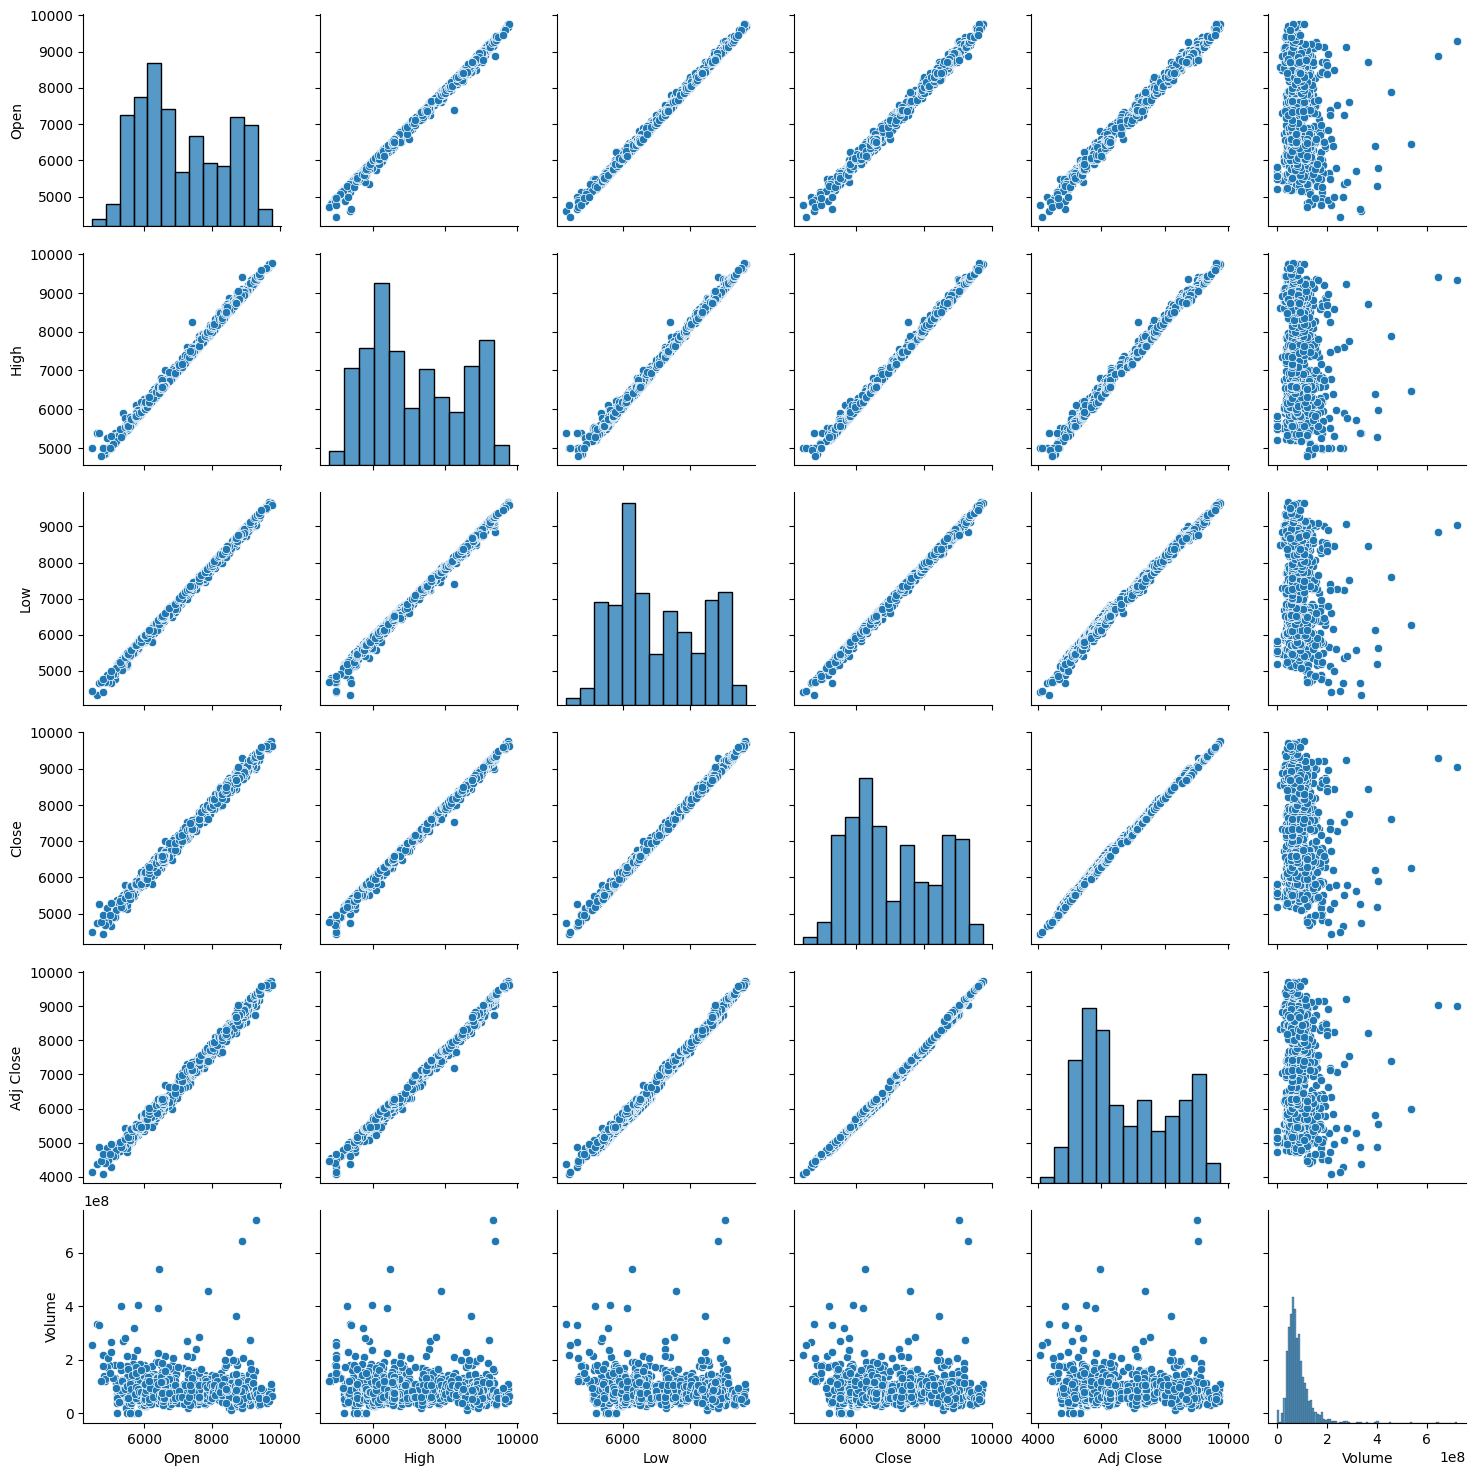

In [6]:
sb.pairplot(data_stock)

##DATA STRUCTURE

In [10]:
data_stock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1248 entries, 0 to 1247
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1248 non-null   object 
 1   Open       1248 non-null   float64
 2   High       1248 non-null   float64
 3   Low        1248 non-null   float64
 4   Close      1248 non-null   float64
 5   Adj Close  1248 non-null   float64
 6   Volume     1248 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 68.4+ KB


In [11]:
data_stock.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1248.000000,1248.000000,1248.000000,1248.000000,1248.000000,1.248000e+03
mean,7120.729167,7183.040865,7056.037660,7119.370994,6811.075320,8.338129e+07
std,1279.267388,1282.909039,1282.063928,1283.958966,1412.430495,5.415374e+07
min,4450.000000,4800.000000,4325.000000,4430.000000,4084.944580,0.000000e+00
25%,6070.000000,6108.750000,6010.000000,6055.000000,5673.119263,5.346812e+07
50%,6800.000000,6847.500000,6727.500000,6785.000000,6320.439453,7.195560e+07
75%,8325.000000,8450.000000,8250.000000,8325.000000,8123.101562,9.831750e+07
max,9775.000000,9775.000000,9675.000000,9750.000000,9750.000000,7.228279e+08


In [12]:
data_stock.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1243    False
1244    False
1245    False
1246    False
1247    False
Length: 1248, dtype: bool

#DATA PROCESSING

##Removing Duplicates


In [13]:
data_stock.drop_duplicates(inplace = True)

##Fill NA

In [14]:
data_num = data_stock.select_dtypes(exclude = object)
data_obj = data_stock.select_dtypes(include = object)

for col in data_stock.columns:
  if col in data_num:
    data_stock[col] = data_stock[col].fillna(data_stock[col].mean)
  elif col in data_obj:
    data_stock[col] = data_stock[col].fillna(data_stock[col].mode()[0])

##Encode Object Type

In [15]:
encoder = LabelEncoder()

for col in data_obj:
  data_stock[col] = encoder.fit_transform(data_stock[col])

##Normalize Data

In [16]:
normal_scaler = MinMaxScaler(feature_range = (0,1))
normal_scaled_x = normal_scaler.fit_transform(data_stock)
data_stock = pd.DataFrame(normal_scaled_x, columns=data_stock.columns)

##Delete Outliers

In [17]:
for col in data_stock.columns:
  upper_limit = data_stock[col].mean() + 3 * data_stock[col].std()
  lower_limit = data_stock[col].mean() - 3 * data_stock[col].std()

  data_stock = data_stock.loc[(data_stock[col] <= upper_limit) & (data_stock[col] >= lower_limit)]

##Final Data Check

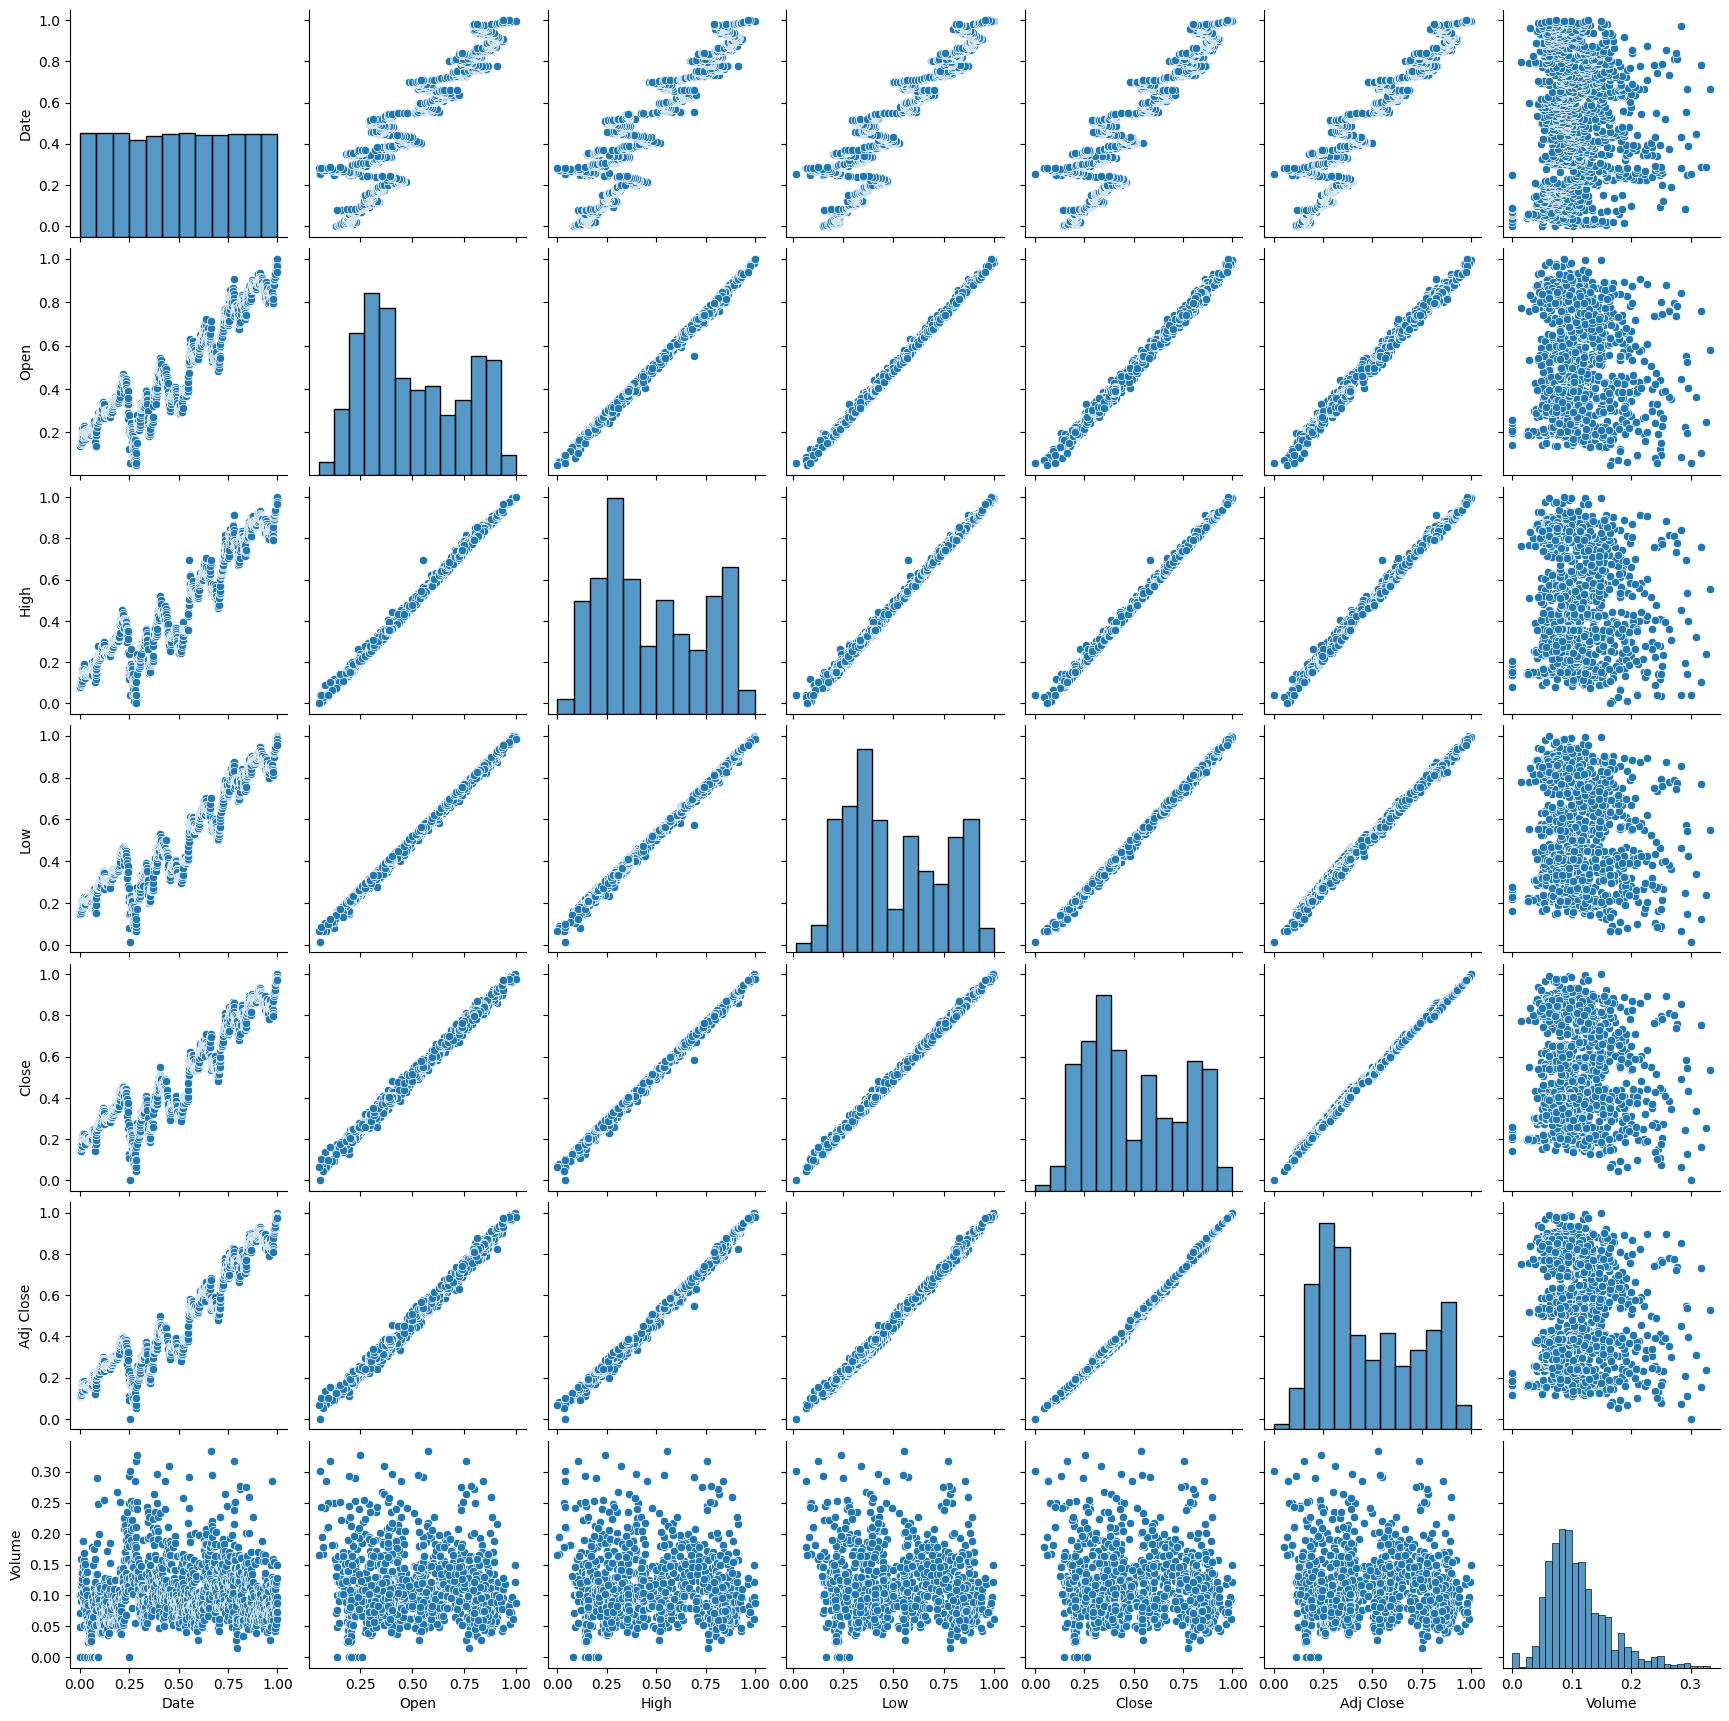

In [18]:
sb.pairplot(data_stock)

In [19]:
data_stock.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1230 entries, 0 to 1247
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1230 non-null   float64
 1   Open       1230 non-null   float64
 2   High       1230 non-null   float64
 3   Low        1230 non-null   float64
 4   Close      1230 non-null   float64
 5   Adj Close  1230 non-null   float64
 6   Volume     1230 non-null   float64
dtypes: float64(7)
memory usage: 76.9 KB


In [20]:
data_stock.describe()

,Date,Open,High,Low,Close,Adj Close,Volume
count,1230.000000,1230.000000,1230.000000,1230.000000,1230.000000,1230.000000,1230.000000
mean,0.500195,0.503128,0.480154,0.512236,0.506987,0.482541,0.109392
std,0.289668,0.238799,0.256892,0.238152,0.240076,0.248286,0.052375
min,0.000000,0.050704,0.000000,0.014953,0.000000,0.000000,0.000000
25%,0.246391,0.306103,0.264322,0.315187,0.307566,0.283502,0.073709
50%,0.501604,0.441784,0.415578,0.449533,0.443609,0.395442,0.098821
75%,0.751203,0.727700,0.733668,0.733645,0.732143,0.712819,0.133790
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.332762


In [21]:
data_stock.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1243    False
1244    False
1245    False
1246    False
1247    False
Length: 1230, dtype: bool

#FEATURE SELECTION

##Find Correlation

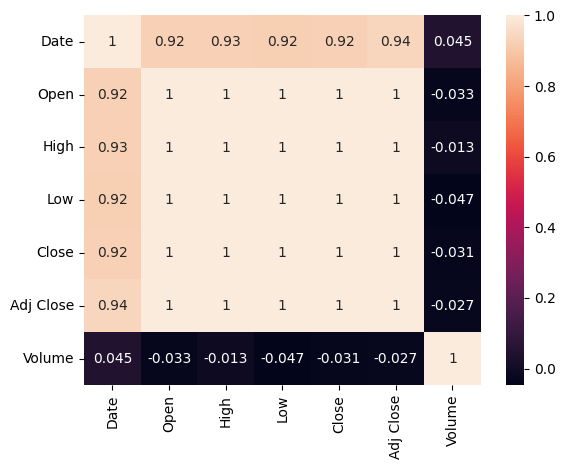

In [22]:
corr_matrix = data_stock.corr()
sb.heatmap(data = corr_matrix, annot = True)
plt.show()

In [23]:
abs_corr = abs(corr_matrix['Open'])
high_corr = abs_corr[abs_corr > 0.2]
features = [col for col in data_stock.columns if col in high_corr]

#BUILD MODEL

##LINEAR REGRESSION

In [24]:
X = data_stock[features].drop('Open', axis = 1)
Y = data_stock['Open']

In [25]:
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

In [29]:
LRM = LinearRegression().fit(X_Train, Y_Train)

YPredTrain = LRM.predict(X_Train)
print("Train Data Set Prediction")
print(f"R2 Score: {r2_score(Y_Train, YPredTrain)}")

YPredTest = LRM.predict(X_Test)
print("Test Data Set Prediction")
print(f"R2 Score: {r2_score(Y_Test, YPredTest)}")


Train Data Set Prediction
R2 Score: 0.9986650450428138
Test Data Set Prediction
R2 Score: 0.9988132701795943
